<a href="https://colab.research.google.com/github/sruthi-21/Spam-Detection-in-Emails/blob/main/Spam_Detection_in_Emails.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import re
import string
import numpy as np
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
import tensorflow as tf

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_extraction.stop_words module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_extraction.text. Anything that cannot be imported from sklearn.feature_extraction.text is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
data = pd.read_csv("data.csv")

In [ ]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
len(data)

5572

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data.Message, data.Category, test_size = 0.2)

In [ ]:
len(x_train),len(x_test)

(4457, 1115)

In [ ]:
data.info

<bound method DataFrame.info of      Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]>

In [ ]:
def remove_hyperlink(word):
    return  re.sub(r"http\S+", "", word)

def to_lower(word):
    result = word.lower()
    return result

def remove_number(word):
    result = re.sub(r'\d+', '', word)
    return result

def remove_punctuation(word):
    result = word.translate(str.maketrans(dict.fromkeys(string.punctuation)))
    return result

def remove_whitespace(word):
    result = word.strip()
    return result

def replace_newline(word):
    return word.replace('\n','')





In [ ]:
def clean_up_pipeline(sentence):
    cleaning_utils = [remove_hyperlink,
                      replace_newline,
                      to_lower,
                      remove_number,
                      remove_punctuation,remove_whitespace]
    for i in cleaning_utils:
        sentence = i(sentence)
    return sentence


In [ ]:
data['Category'].isnull().sum(),data['Message'].isnull().sum()

(0, 0)

In [ ]:
x_train = [clean_up_pipeline(row) for row in x_train]
x_test = [clean_up_pipeline(row) for row in x_test]


In [ ]:
x_train[0]

'so now my dad is gonna call after he gets out of work and ask all these crazy questions'

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le_y_train = le.fit_transform(y_train.values)
le_y_test = le.transform(y_test.values)

In [ ]:
le_y_train.sum()

592

In [ ]:
df=pd.DataFrame(le_y_train)

In [ ]:
df.head()

,0
0,0
1,0
2,0
3,1
4,0


In [ ]:
df[df[0]==1].head()

,0
3,1
24,1
27,1
32,1
37,1


In [ ]:
embed_size = 100
max_feature = 50000
max_len = 2000

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
tokenizer = Tokenizer(num_words=max_feature)

tokenizer.fit_on_texts(x_train)

x_train_features = np.array(tokenizer.texts_to_sequences(x_train))
x_test_features = np.array(tokenizer.texts_to_sequences(x_test))

x_train_features[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


[23,
 22,
 11,
 376,
 9,
 199,
 16,
 144,
 72,
 945,
 50,
 14,
 134,
 7,
 142,
 46,
 541,
 648,
 795]

In [ ]:
from keras.preprocessing.sequence import pad_sequences
x_train_features = pad_sequences(x_train_features,maxlen=max_len)
x_test_features = pad_sequences(x_test_features,maxlen=max_len)
x_train_features[0]

array([  0,   0,   0, ..., 541, 648, 795], dtype=int32)

In [ ]:
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional
from keras.models import Model

In [ ]:
embedding_vecor_length = 32

model = tf.keras.Sequential()
model.add(Embedding(max_feature, embedding_vecor_length, input_length=max_len))
model.add(Bidirectional(tf.keras.layers.LSTM(64)))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 2000, 32)          1600000   
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               49664     
_________________________________________________________________
dense (Dense)                (None, 16)                2064      
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 1,651,745
Trainable params: 1,651,745
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history = model.fit(x_train_features, le_y_train, batch_size=128, epochs=10, validation_data=(x_test_features, le_y_test))

Epoch 1/10
35/35 [==============================] - 30s 489ms/step - loss: 0.4264 - accuracy: 0.8672 - val_loss: 0.2921 - val_accuracy: 0.8610
Epoch 2/10
35/35 [==============================] - 16s 461ms/step - loss: 0.1783 - accuracy: 0.9372 - val_loss: 0.1156 - val_accuracy: 0.9704
Epoch 3/10
35/35 [==============================] - 16s 461ms/step - loss: 0.0585 - accuracy: 0.9886 - val_loss: 0.0468 - val_accuracy: 0.9874
Epoch 4/10
35/35 [==============================] - 16s 461ms/step - loss: 0.0279 - accuracy: 0.9933 - val_loss: 0.0430 - val_accuracy: 0.9901
Epoch 5/10
35/35 [==============================] - 16s 460ms/step - loss: 0.0143 - accuracy: 0.9957 - val_loss: 0.0475 - val_accuracy: 0.9901
Epoch 6/10
35/35 [==============================] - 16s 460ms/step - loss: 0.0102 - accuracy: 0.9980 - val_loss: 0.0579 - val_accuracy: 0.9883
Epoch 7/10
35/35 [==============================] - 16s 461ms/step - loss: 0.0066 - accuracy: 0.9984 - val_loss: 0.0529 - val_accuracy: 0.9892

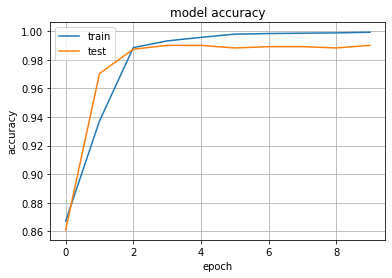

In [ ]:
from  matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix,f1_score, precision_score,recall_score

In [ ]:
y_predict  = [1 if o>0.5 else 0 for o in model.predict(x_test_features)]

In [ ]:
cf_matrix =confusion_matrix(le_y_test,y_predict)

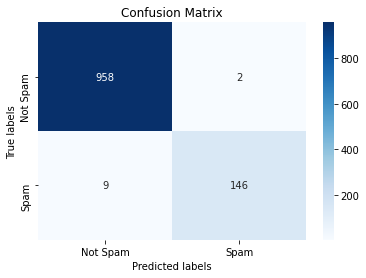

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cf_matrix, annot=True, ax = ax,cmap='Blues',fmt=''); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Not Spam', 'Spam']); ax.yaxis.set_ticklabels(['Not Spam', 'Spam']);


In [ ]:
tn, fp, fn, tp = confusion_matrix(le_y_test,y_predict).ravel()

In [ ]:
print("Precision: {:.2f}%".format(100 * precision_score(le_y_test, y_predict)))
print("Recall: {:.2f}%".format(100 * recall_score(le_y_test, y_predict)))
print("F1 Score: {:.2f}%".format(100 * f1_score(le_y_test,y_predict)))

Precision: 98.65%
Recall: 94.19%
F1 Score: 96.37%


In [ ]:
f1_score(le_y_test,y_predict)

0.9636963696369637